# Unsupervised Learning

Unsupervised learning subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm. In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data.


In the supervised learning setting, we typically have access to a set of p features <em>X1,X2,...,Xp</em>, measured on n observations, and a response Y also measured on those same n observations. The goal is then to predict Y using <em>X1,X2,...,Xp</em>.

Unsupervised learning is a set of statistical tools intended for the setting in which we have only a set of features <em>X1, X2,..., Xp</em> measured on n observations. **We are not interested in prediction**, because we do not have an associated response variable Y . 

Rather, the goal is to discover interesting things about the measurements on X1, X2, . . . , Xp. Is there an informative way to visualize the data? Can we discover subgroups among the variables or among the observations? Unsupervised learning refers to a diverse set of techniques for answering questions such as these.

## Clustering


Clustering refers to a very broad set of techniques for finding subgroups, or clusters, in a data set. 

When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other, while observations in different groups are quite different from each other. 

Of course, to make this concrete, we must define what it means for two or more observations to be similar or different. Indeed, this is often a domain-specific consideration that must be made based on knowledge of the data being studied.

<br>

<center><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"></center>
<center>clustering Algorithms in Sklearn</center>

### K-means


K-means clustering is a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares 

To perform K-means clustering, we must first specify the desired number of clusters K; then the K-means algorithm will assign each observation to exactly one of the K clusters. 


It is a general-purpose algorithm and is used when you have even cluster size, flat geometry, and not too many clusters.

---
**K-Means Clustering Algorithm**
1. Randomly assign a number, from 1 to K, to each of the observations.
These serve as initial cluster assignments for the observations. 


2. Iterate until the cluster assignments stop changing:
    
    (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.
    
    (b) Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).
---

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rng = np.random.RandomState(42)

In [3]:
X, y = make_blobs(centers=4, random_state=rng)

(4, 2)
(100,)
(100,)


/usr/local/google/home/amirimani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


([], [])

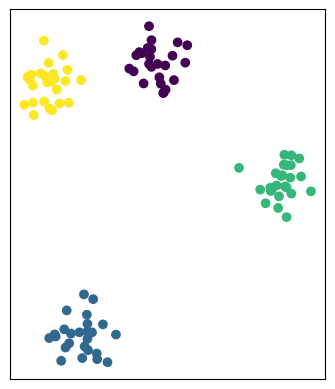

In [12]:
km = KMeans(n_clusters=4, random_state=rng)
km.fit(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X).shape)
# scatter_tab()
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

([], [])

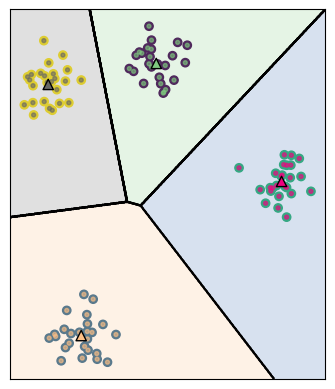

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)


xlim = plt.xlim()
ylim = plt.ylim()

xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = km.predict(np.c_[xx.ravel(), yy.ravel()])

plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=.2, cmap='Accent')
plt.contour(xx, yy, pred.reshape(xx.shape), colors='k')
plt.scatter(X[:, 0], X[:, 1], s=8, alpha=.6, c=km.labels_, cmap='Accent')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            s=55,
            cmap='Accent', marker="^", c=range(km.n_clusters),
            edgecolor='k'
           )

plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

### DBSCAN


The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. 


The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). 

# Dimensionality Reduction

If your number of features is high, it may be useful to reduce it with an unsupervised step prior to supervised steps. 

## Principle Component Analysis (PCA)

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.

i.e. PCA is a way to bring out strong patterns from large and complex datasets. The essence of the data is captured in a few principal components, which themselves convey the most variation in the dataset. PCA reduces the number of dimensions without selecting or discarding them.

<center><img src="https://miro.medium.com/max/499/1*V9yJUH9tVrMQI88TuIkCFQ.gif"></center>

It is often interesting to project data to a lower-dimensional space that preserves most of the variance, by dropping the singular vector of components associated with lower singular values.

Both clustering and PCA seek to simplify the data via a small number of summaries, but their mechanisms are different:

* PCA looks to find a low-dimensional representation of the observations that explain a good fraction of the variance;
* Clustering looks to find homogeneous subgroups among the observations.

In [14]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [15]:
iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)

(150, 4)


In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

(150, 2)


Text(0, 0.5, 'second principal component')

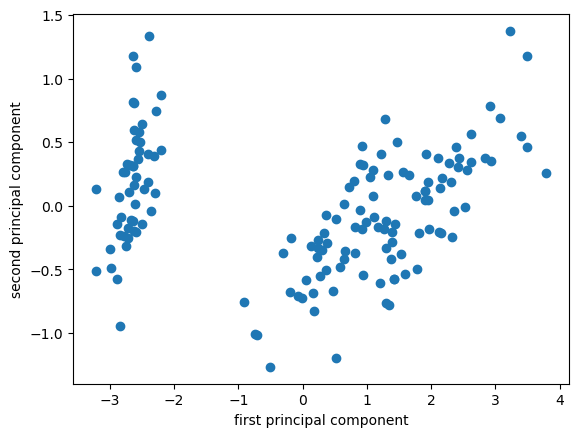

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.data)
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

Text(0, 0.5, 'second principal component')

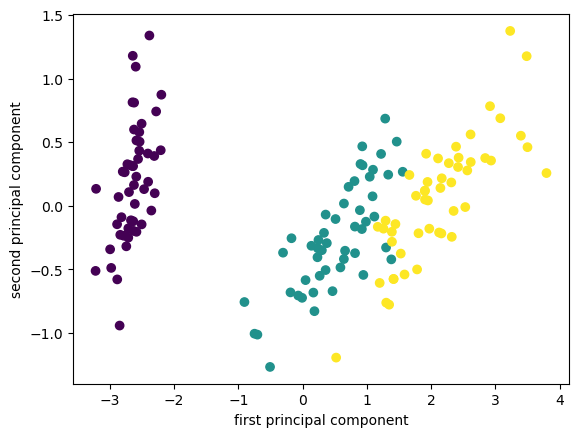

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

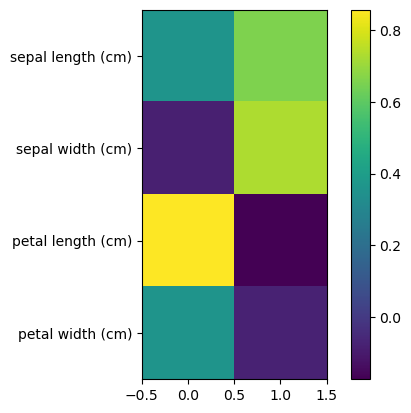

In [19]:
components = pca.components_
plt.imshow(components.T)
plt.yticks(range(len(iris.feature_names)), iris.feature_names)
plt.colorbar()

components_array, shape (n_components, n_features)
Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by `explained_variance_`.

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

Text(0, 0.5, 'second principal component')

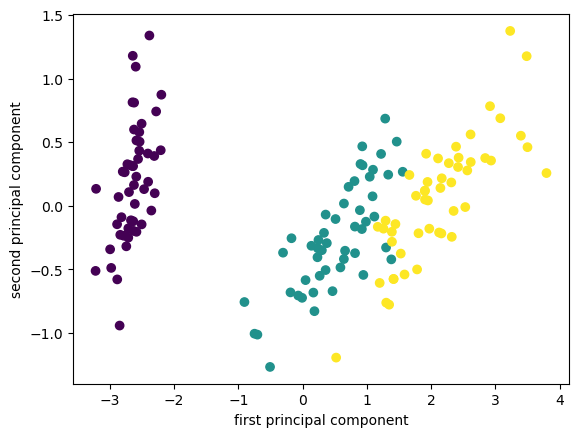

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

Text(0, 0.5, 'second principal component')

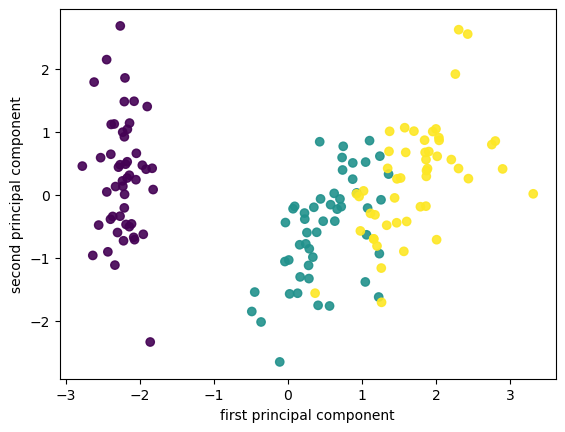

In [25]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))


X_pca_scaled = pca_scaled.fit_transform(X)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

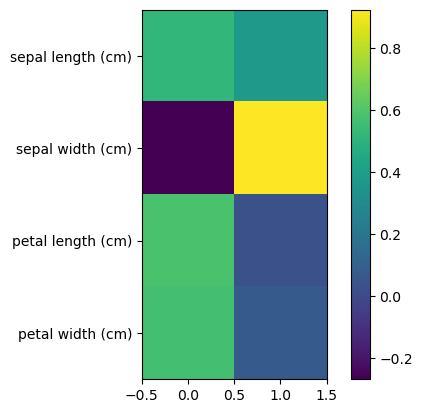

In [26]:
components = pca_scaled.named_steps['pca'].components_
plt.imshow(components.T)
plt.yticks(range(len(iris.feature_names)), iris.feature_names)
plt.colorbar()

Text(0, 0.5, 'second principal component')

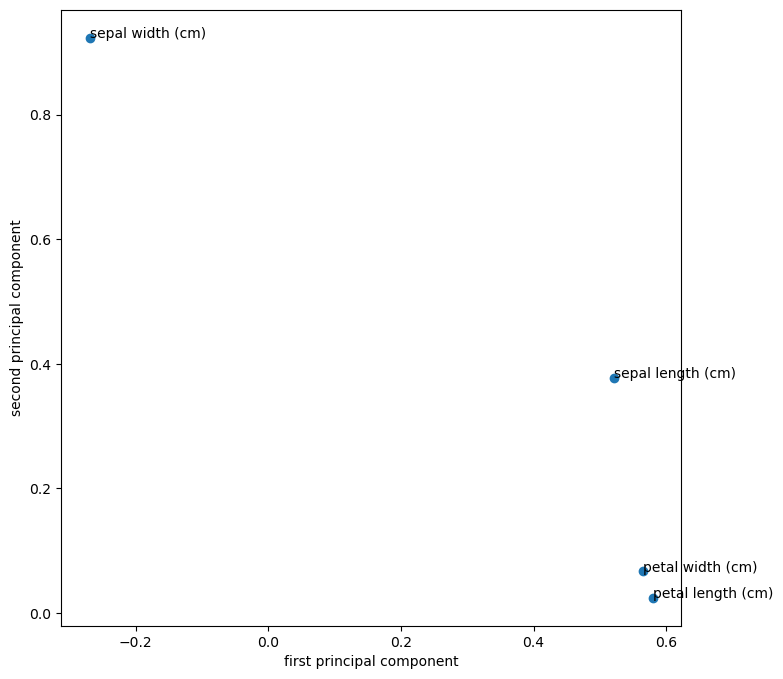

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(components[0], components[1])
for i, feature_contribution in enumerate(components.T):
    plt.annotate(iris.feature_names[i], feature_contribution)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

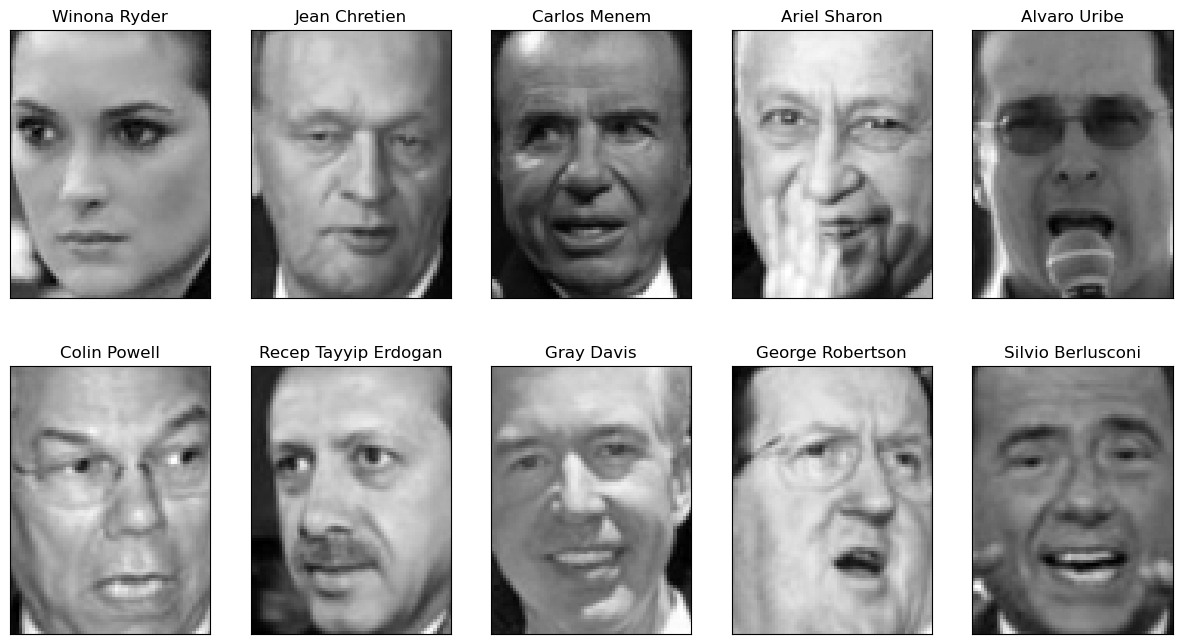

In [28]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [29]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [30]:
pca = PCA(n_components=5, whiten=True, random_state=rng).fit(X_people)

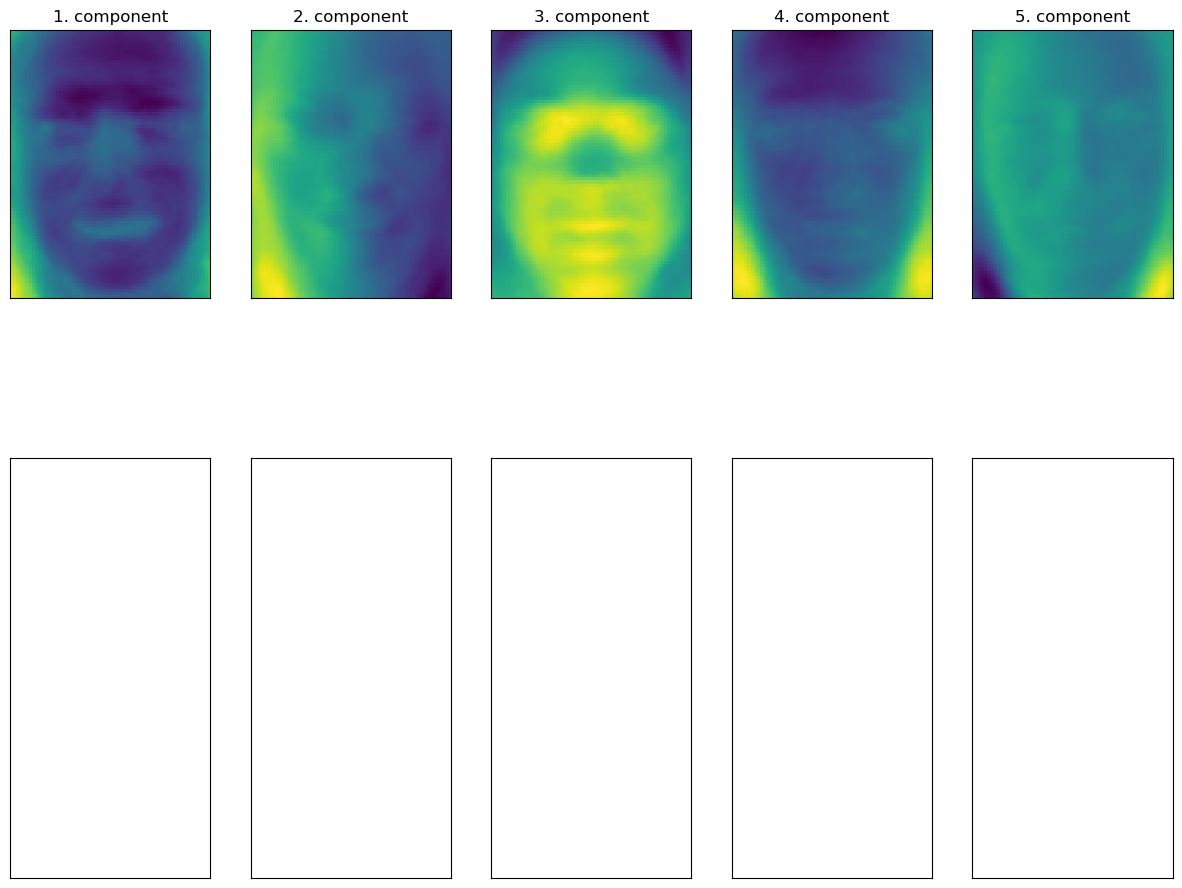

In [31]:
fix, axes = plt.subplots(2, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))